<a href="https://colab.research.google.com/github/ElkinAleman/DataScience/blob/main/ACP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PCA Encuesta de Calidad de Vida 2015**


La Encuesta de Calidad de Vida es una investigación sobre las condiciones de vida para Medellín. Con el fin de tener una visión más detallada, se realiza a nivel de comunas y corregimientos, teniendo representatividad para el total Medellín y para la desagregación territorial referenciada.

La encuesta, es el insumo para el cálculo del Indicador Multidimensional de Condiciones de Vida (IMCV), el cual constituye el eje central de dicha encuesta. El IMCV es un indicador compuesto que permite medir la evolución de las condiciones de vida de la población de la ciudad. En su diseño se tiene en cuenta el concepto de la multidimensionalidad, el cual se traduce en la combinación - en una sola medida - de variables asociadas con los estándares de vida, las dinámicas sociales y el capital humano.


1. Dimension 1 Entorno y Vivienda

2. Dimension 2 Acceso a servicios públicos

3. Dimension 3 Medio ambiente

4. Dimension 4  Escolaridad

5. Dimension 5 Desescolarización

6. Dimension 6 Movilidad

7. Dimension 7 Capital Físico del Hogar

8. Dimension 8 Participación

9. Dimension 9 Libertad y Seguridad

10. Dimension 10 Vulnerabilidad

11. Dimension 11 Salud

12. Dimension 12 trabajo

13. Dimension 13 Recreación

14. Dimension 14 Percepción de la calidad de vida

15. Dimension 15 Ingresos


https://www.medellin.gov.co/irj/go/km/docs/pccdesign/medellin/Temas/PlaneacionMunicipal/IndicadoresEstadisticas/PaginasECV/Shared%20Content/Documentos/Encuesta%20Calidad%20de%20vida%202015/Ficha%20tecnica%20ECV%202015.pdf

In [ ]:
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! pip install funpymodeling
! pip install pygwalker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 62.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.6/204.6 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.3/325.3 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 68.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 59.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 kB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.8

In [ ]:
import pandas as pd
import numpy as np
#from funpymodeling.exploratory import freq_tbl, status, profiling_num, cat_vars, num_vars

# visualizaciones

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import plotly.express as px # graficas interactivas
from yellowbrick.cluster import KElbowVisualizer # visualizar los Clúster
import plotly.graph_objects as go # gráficos interactivos
#import pygwalker as pyg # Para visualizaciones tipo dashboart
style.use('ggplot') or plt.style.use('ggplot')

# Librerias para ajustar modelos

import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import plotly.io as pio
pio.renderers.default = 'colab'


In [ ]:
!pip install chardet

In [ ]:
# Identificamos la codificación del archivo
import chardet

ruta = '/content/drive/MyDrive/BASES DE DATOS/BD/Indice calidad de vida.csv'
with open(ruta, 'rb') as f:
    result = chardet.detect(f.read())
    print(result)

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/BASES DE DATOS/BD/Indice calidad de vida.csv', sep = ';',
                 encoding='ISO-8859-1')
df.head()

,Codigo,Comunas,D1Entorno,D2Acceso,D3Medioambiente,D4Escolaridad,D5Desescolarizacion,D6Movilidad,D7Capital,D8Participacion,D9Libertad,D10Vulnerabilidad,D11Salud,D12Trabajo,D13Recreacion,D14Percepcion,D15Gastos
0,1.0,Popular,"1,237","3,607","1,753","1,811","4,146","1,262","3,667","1,098","1,729","7,018","3,041","0,485","0,067","1,355","1,039"
1,2.0,Santa Cruz,"1,722","3,879","1,807","1,921","4,2","1,309","3,874","1,096","1,805","7,829","3,205","0,507","0,056","1,447","1,096"
2,3.0,Manrique,"2,006","3,684","2,268","1,899","4,13","1,291","4,306","1,162","1,934","8,495","3,46","0,584","0,072","1,433","1,105"
3,4.0,Aranjuez,"3,413","3,909","2,373","2,06","4,152","1,546","5,267","1,234","2,027","10,841","3,757","0,604","0,098","1,54","1,249"
4,5.0,Castilla,"3,998","4,012","2,314","2,278","4,254","1,527","5,95","1,315","1,733","11,83","3,672","0,6","0,101","1,556","1,453"


In [ ]:
df.tail(3)

,Codigo,Comunas,D1Entorno,D2Acceso,D3Medioambiente,D4Escolaridad,D5Desescolarizacion,D6Movilidad,D7Capital,D8Participacion,D9Libertad,D10Vulnerabilidad,D11Salud,D12Trabajo,D13Recreacion,D14Percepcion,D15Gastos
19,80.0,Corregimiento de San Antonio de Prado,"2,825","3,755","2,96","1,967","4,194","1,529","4,914","1,279","1,861","9,916","3,555","0,565","0,012","1,503","1,273"
20,90.0,Corregimiento de Santa Elena,"2,082","2,421","3,849","1,722","4,209","1,247","3,706","1,484","1,837","9,411","3,055","0,705","0,018","1,38","1,249"
21,NaN,Total,"4,172","3,899","2,573","2,502","4,237","1,489","6,1","1,307","1,842","12,119","3,59","0,599","0,071","1,517","1,611"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Codigo               21 non-null     float64
 1   Comunas              22 non-null     object 
 2   D1Entorno            22 non-null     object 
 3   D2Acceso             22 non-null     object 
 4   D3Medioambiente      22 non-null     object 
 5   D4Escolaridad        22 non-null     object 
 6   D5Desescolarizacion  22 non-null     object 
 7   D6Movilidad          22 non-null     object 
 8   D7Capital            22 non-null     object 
 9   D8Participacion      22 non-null     object 
 10  D9Libertad           22 non-null     object 
 11  D10Vulnerabilidad    22 non-null     object 
 12  D11Salud             22 non-null     object 
 13  D12Trabajo           22 non-null     object 
 14  D13Recreacion        22 non-null     object 
 15  D14Percepcion        22 non-null     objec

In [ ]:
df.isnull().sum()

,0
Codigo,1
Comunas,0
D1Entorno,0
D2Acceso,0
D3Medioambiente,0
D4Escolaridad,0
D5Desescolarizacion,0
D6Movilidad,0
D7Capital,0
D8Participacion,0


In [ ]:
status(df)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Codigo,17,0.447368,0,0.0,21,float64
1,Comunas,16,0.421053,0,0.0,22,object
2,D1Entorno,16,0.421053,0,0.0,22,object
3,D2Acceso,16,0.421053,0,0.0,22,object
4,D3Medioambiente,16,0.421053,0,0.0,22,object
5,D4Escolaridad,16,0.421053,0,0.0,22,object
6,D5Desescolarizacion,16,0.421053,0,0.0,22,object
7,D6Movilidad,16,0.421053,0,0.0,21,object
8,D7Capital,16,0.421053,0,0.0,22,object
9,D8Participacion,16,0.421053,0,0.0,22,object


# Tratamiento de valores N/A y la converción del tipo de datos

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

,0
Codigo,0
Comunas,0
D1Entorno,0
D2Acceso,0
D3Medioambiente,0
D4Escolaridad,0
D5Desescolarizacion,0
D6Movilidad,0
D7Capital,0
D8Participacion,0


In [ ]:
# Se elimina la variable Codigo. No es relevante

df = df.drop(['Codigo'], axis=1)
df.head()

,Comunas,D1Entorno,D2Acceso,D3Medioambiente,D4Escolaridad,D5Desescolarizacion,D6Movilidad,D7Capital,D8Participacion,D9Libertad,D10Vulnerabilidad,D11Salud,D12Trabajo,D13Recreacion,D14Percepcion,D15Gastos
0,Popular,"1,237","3,607","1,753","1,811","4,146","1,262","3,667","1,098","1,729","7,018","3,041","0,485","0,067","1,355","1,039"
1,Santa Cruz,"1,722","3,879","1,807","1,921","4,2","1,309","3,874","1,096","1,805","7,829","3,205","0,507","0,056","1,447","1,096"
2,Manrique,"2,006","3,684","2,268","1,899","4,13","1,291","4,306","1,162","1,934","8,495","3,46","0,584","0,072","1,433","1,105"
3,Aranjuez,"3,413","3,909","2,373","2,06","4,152","1,546","5,267","1,234","2,027","10,841","3,757","0,604","0,098","1,54","1,249"
4,Castilla,"3,998","4,012","2,314","2,278","4,254","1,527","5,95","1,315","1,733","11,83","3,672","0,6","0,101","1,556","1,453"


In [ ]:
df.shape

(21, 16)

In [ ]:
# Transformación de variables:
"""
Las variables numéricas estan separadas por "," por lo tanto Python las lee como
objeto. Para cambiar esto se usa la siguiente instrucción y lugo se convierte a float.
"""

bd = df.iloc[:, 1:16]
bd = bd.apply(lambda x: x.str.replace(',','.') if x.dtype == 'object' else x)
bd = bd.astype(float)
bd.head()

,D1Entorno,D2Acceso,D3Medioambiente,D4Escolaridad,D5Desescolarizacion,D6Movilidad,D7Capital,D8Participacion,D9Libertad,D10Vulnerabilidad,D11Salud,D12Trabajo,D13Recreacion,D14Percepcion,D15Gastos
0,1.237,3.607,1.753,1.811,4.146,1.262,3.667,1.098,1.729,7.018,3.041,0.485,0.067,1.355,1.039
1,1.722,3.879,1.807,1.921,4.200,1.309,3.874,1.096,1.805,7.829,3.205,0.507,0.056,1.447,1.096
2,2.006,3.684,2.268,1.899,4.130,1.291,4.306,1.162,1.934,8.495,3.460,0.584,0.072,1.433,1.105
3,3.413,3.909,2.373,2.060,4.152,1.546,5.267,1.234,2.027,10.841,3.757,0.604,0.098,1.540,1.249
4,3.998,4.012,2.314,2.278,4.254,1.527,5.950,1.315,1.733,11.830,3.672,0.600,0.101,1.556,1.453


In [ ]:
bd.dtypes

,0
D1Entorno,float64
D2Acceso,float64
D3Medioambiente,float64
D4Escolaridad,float64
D5Desescolarizacion,float64
D6Movilidad,float64
D7Capital,float64
D8Participacion,float64
D9Libertad,float64
D10Vulnerabilidad,float64


In [ ]:
bd['Comunas'] = df['Comunas']

# Exploración de datos

In [ ]:
bd.tail(3)

,D1Entorno,D2Acceso,D3Medioambiente,D4Escolaridad,D5Desescolarizacion,D6Movilidad,D7Capital,D8Participacion,D9Libertad,D10Vulnerabilidad,D11Salud,D12Trabajo,D13Recreacion,D14Percepcion,D15Gastos,Comunas
18,3.202,3.055,3.028,1.689,4.071,1.296,5.048,1.144,1.807,10.660,3.640,0.540,0.024,1.394,1.344,Corregimiento de Altavista
19,2.825,3.755,2.960,1.967,4.194,1.529,4.914,1.279,1.861,9.916,3.555,0.565,0.012,1.503,1.273,Corregimiento de San Antonio de Prado
20,2.082,2.421,3.849,1.722,4.209,1.247,3.706,1.484,1.837,9.411,3.055,0.705,0.018,1.380,1.249,Corregimiento de Santa Elena


In [ ]:
bd = bd.drop(bd[bd['Comunas']== 'Total'].index)

In [ ]:
bd.describe().T

,count,mean,std,min,25%,50%,75%,max
D1Entorno,21.0,3.912286,2.392337,1.237,2.231,3.199,5.144,9.391
D2Acceso,21.0,3.715048,0.548622,2.136,3.619,3.884,4.014,4.298
D3Medioambiente,21.0,2.764238,0.791424,1.753,2.314,2.772,2.999,5.501
D4Escolaridad,21.0,2.364429,0.801552,1.482,1.891,2.060,2.656,4.873
D5Desescolarizacion,21.0,4.223762,0.124229,4.071,4.129,4.194,4.308,4.496
D6Movilidad,21.0,1.483286,0.145229,1.247,1.380,1.527,1.546,1.717
D7Capital,21.0,5.782952,2.192891,3.389,4.477,5.048,6.793,12.323
D8Participacion,21.0,1.304095,0.162754,1.096,1.162,1.291,1.402,1.649
D9Libertad,21.0,1.866857,0.161085,1.653,1.803,1.850,1.910,2.465
D10Vulnerabilidad,21.0,11.701381,3.918515,7.018,9.306,10.511,13.715,20.845


In [ ]:
var = bd.apply(lambda x: x.var() if x.dtypes == 'float' else x).reset_index()
var = var.rename(columns={'index':'Variable', 0:'Varianza'})
var

,Variable,Varianza
0,D1Entorno,5.723275
1,D2Acceso,0.300986
2,D3Medioambiente,0.626352
3,D4Escolaridad,0.642486
4,D5Desescolarizacion,0.015433
5,D6Movilidad,0.021092
6,D7Capital,4.80877
7,D8Participacion,0.026489
8,D9Libertad,0.025948
9,D10Vulnerabilidad,15.354763


In [ ]:
isinstance(var, pd.DataFrame)

True

In [ ]:
var = var.drop(var[var['Variable']== 'Comunas'].index)


In [ ]:
var.dtypes.to_frame()

,0
Variable,object
Varianza,object


In [ ]:
var['Varianza'] = var['Varianza'].astype(float)

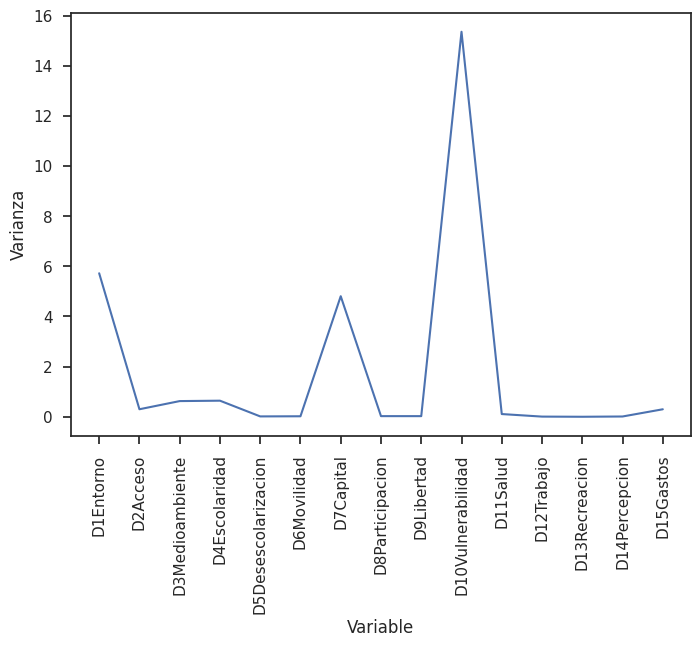

In [ ]:
plt.style.use('ggplot')
sns.set_theme(style="ticks")
sns.lineplot(data=var, x='Variable', y='Varianza')
plt.xticks(rotation=90)
plt.show()

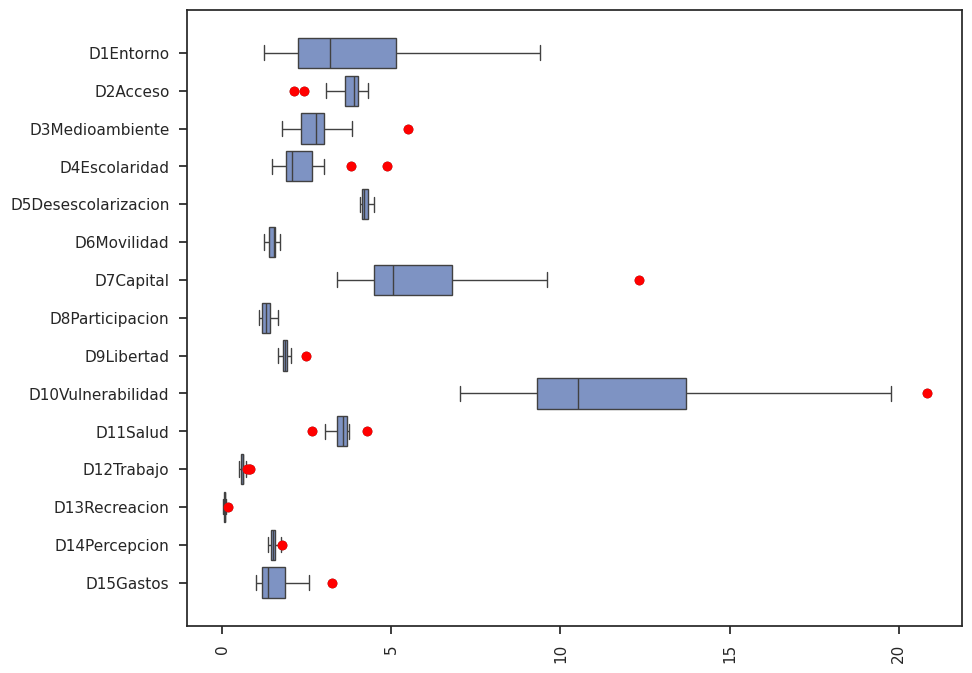

In [ ]:
"""
 Gráfico de cajas para cada variable. Los puntos de color rojos son los datos atípicos.
"""

plt.figure(figsize=(10, 8))
plt.style.use('ggplot')
sns.set_theme(style="ticks")

dfp = bd.iloc[:, 0:15]

# Crear el boxplot en orientación horizontal
ax = sns.boxplot(data=dfp, color='#728FCE', orient='h')

# Identificar y graficar los outliers en rojo
for i, columna in enumerate(dfp.columns):
    # Calcular los límites para los outliers
    Q1 = np.percentile(dfp[columna].dropna(), 25)  # Primer cuartil
    Q3 = np.percentile(dfp[columna].dropna(), 75)  # Tercer cuartil
    IQR = Q3 - Q1  # Rango intercuartílico
    limite_inferior = Q1 - 1.5 * IQR  # Límite inferior para outliers
    limite_superior = Q3 + 1.5 * IQR  # Límite superior para outliers

    # Filtrar los outliers
    atipicos = dfp[(dfp[columna] < limite_inferior) | (dfp[columna] > limite_superior)][columna]

    # Graficar los outliers en rojo
    ax.scatter(atipicos, [i] * len(atipicos), color='red', zorder=3)  # 'zorder=3' para que los puntos estén sobre el boxplot

plt.xticks(rotation=90)
plt.show()

<Figure size 1000x800 with 0 Axes>

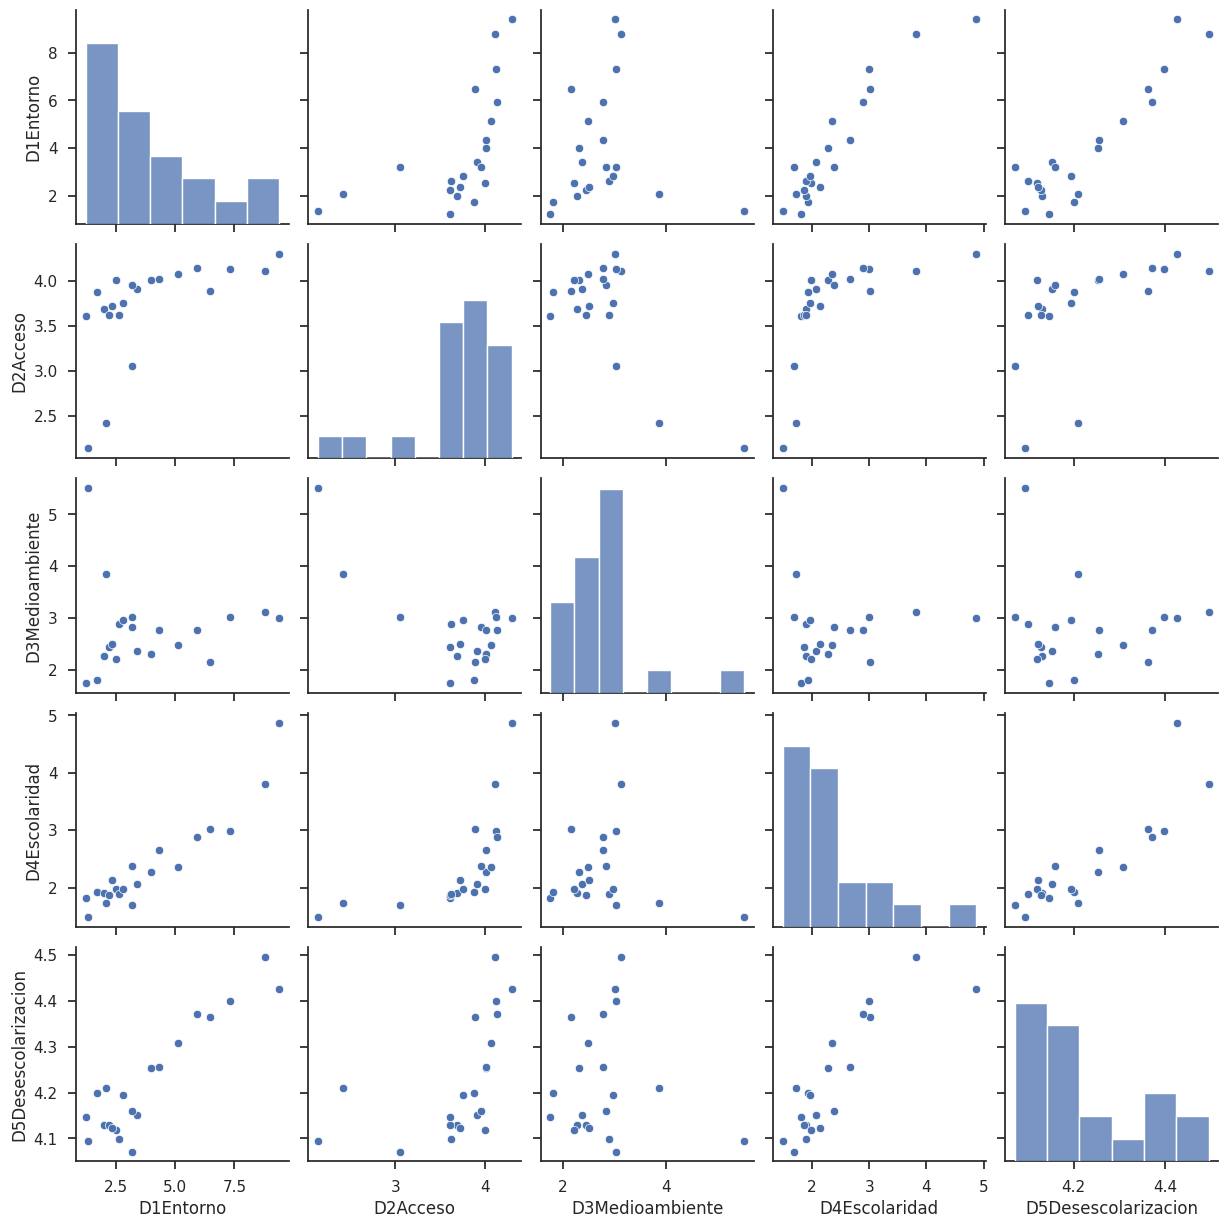

In [ ]:
df1 =bd.iloc[:, 0:5]

plt.figure(figsize=(10,8))
sns.pairplot(df1)
plt.show()

In [ ]:
# Matris de correlación
dfcor = bd.iloc[:, 0:15]
dfcor.corr().sort_values(by='D7Capital', ascending=False)

,D1Entorno,D2Acceso,D3Medioambiente,D4Escolaridad,D5Desescolarizacion,D6Movilidad,D7Capital,D8Participacion,D9Libertad,D10Vulnerabilidad,D11Salud,D12Trabajo,D13Recreacion,D14Percepcion,D15Gastos
D7Capital,0.971959,0.596348,-0.020017,0.973297,0.862870,0.594633,1.000000,0.795076,-0.114067,0.972507,0.756221,0.409805,0.299443,0.831573,0.976342
D15Gastos,0.943313,0.506063,0.044353,0.972966,0.847329,0.536435,0.976342,0.798561,-0.089288,0.948953,0.695547,0.474228,0.301859,0.797759,1.000000
D4Escolaridad,0.936174,0.597789,-0.058061,1.000000,0.860661,0.537314,0.973297,0.788085,-0.148300,0.935692,0.688628,0.411392,0.346753,0.800024,0.972966
D10Vulnerabilidad,0.998459,0.542523,0.025624,0.935692,0.914311,0.631193,0.972507,0.844438,-0.133916,1.000000,0.695792,0.421385,0.253873,0.814970,0.948953
D1Entorno,1.000000,0.564864,0.001594,0.936174,0.918251,0.641525,0.971959,0.825422,-0.137314,0.998459,0.696599,0.405018,0.272600,0.818196,0.943313
D5Desescolarizacion,0.918251,0.531219,-0.038549,0.860661,1.000000,0.576246,0.862870,0.833949,-0.176299,0.914311,0.510189,0.363057,0.232573,0.758696,0.847329
D14Percepcion,0.818196,0.336621,0.336137,0.800024,0.758696,0.848449,0.831573,0.768174,0.354595,0.814970,0.439727,0.631366,0.584274,1.000000,0.797759
D8Participacion,0.825422,0.188963,0.361090,0.788085,0.833949,0.595937,0.795076,1.000000,0.050069,0.844438,0.386847,0.613159,0.214890,0.768174,0.798561
D11Salud,0.696599,0.760449,-0.388958,0.688628,0.510189,0.294969,0.756221,0.386847,-0.353675,0.695792,1.000000,0.030969,0.007976,0.439727,0.695547
D2Acceso,0.564864,1.000000,-0.698987,0.597789,0.531219,0.285791,0.596348,0.188963,-0.525038,0.542523,0.760449,-0.323237,-0.008474,0.336621,0.506063


# Gráfico de Correlaciones

<Figure size 1000x1500 with 0 Axes>

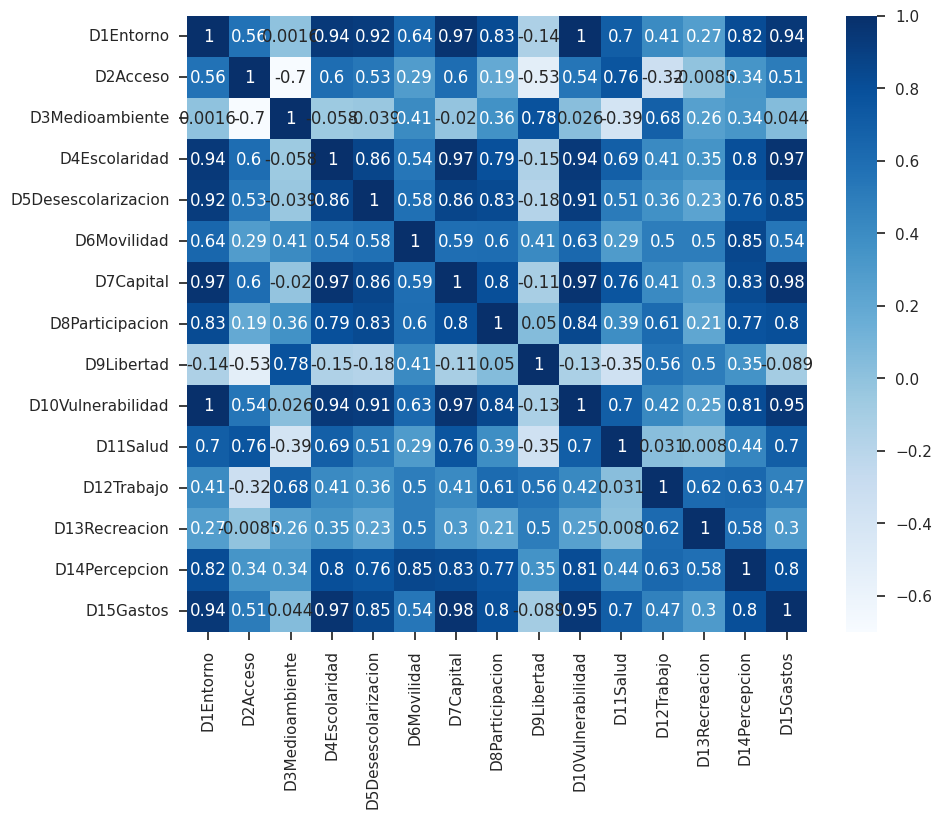

In [ ]:
plt.figure(figsize=(10,15))
dfcor = bd.iloc[:, 0:15]

plt.figure(figsize=(10,8))
sns.heatmap(dfcor.corr(), annot=True, cmap='Blues')
plt.show()


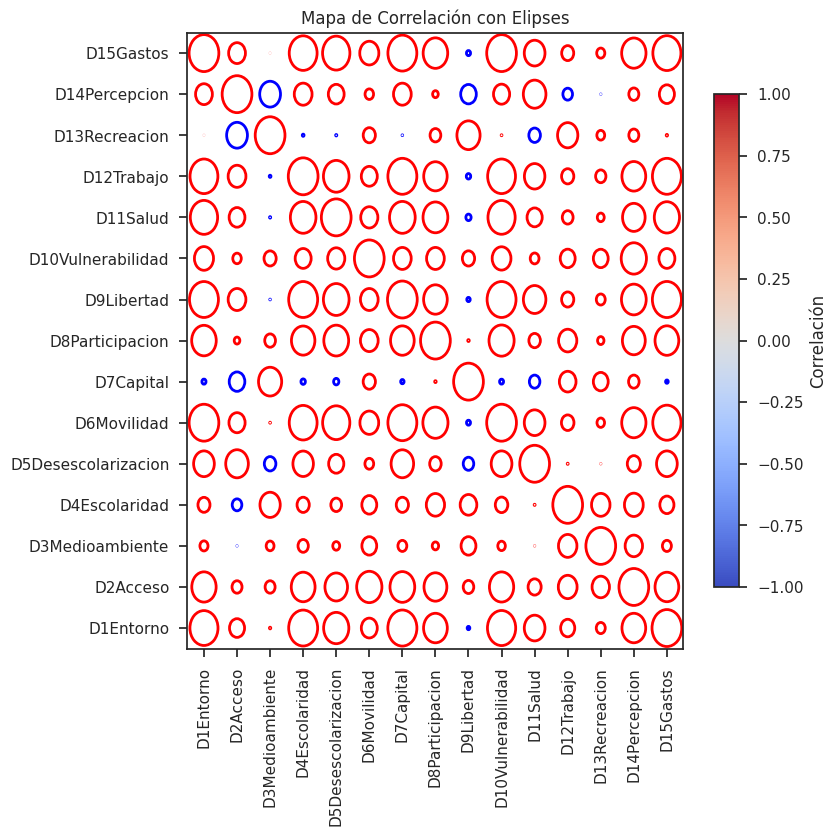

In [ ]:
from matplotlib.patches import Ellipse
corr = dfcor.corr()

# Función para dibujar elipses según la correlación
def draw_ellipse(ax, x, y, width, height, angle, color):
    ellipse = Ellipse((x, y), width, height, angle=angle, edgecolor=color, facecolor='none', linewidth=2)
    ax.add_patch(ellipse)

# Configurar el gráfico
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(-0.5, len(corr.columns)-0.5)
ax.set_ylim(-0.5, len(corr.columns)-0.5)
ax.set_xticks(range(len(corr.columns)))
ax.set_xticklabels(corr.columns, rotation=90)
ax.set_yticks(range(len(corr.columns)))
ax.set_yticklabels(corr.columns)

# Dibujar elipses
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        coef = corr.iloc[i, j]  # Coeficiente de correlación
        color = "red" if coef > 0 else "blue"  # Color según signo de correlación
        width = height = 0.9 * abs(coef)  # Tamaño proporcional a la correlación
        angle = 45 if coef > 0 else -45  # Inclinación de la elipse
        draw_ellipse(ax, j, len(corr.columns) - 1 - i, width, height, angle, color)

# Agregar una barra de color
sm = plt.cm.ScalarMappable(cmap="coolwarm", norm=plt.Normalize(vmin=-1, vmax=1))
plt.colorbar(sm, ax=ax, shrink=0.8, label="Correlación")

plt.title("Mapa de Correlación con Elipses")
plt.show()


# Interpretación de los dos gráficos anteriores

Los dos gráficos mostrados anteriormente calculan la relación entre las variables. Los gráficos difieren principalmente en el que uno muestra los valores (cuantificados) y el otro muestra la relación de las variables en un figura circular. Ahora bien, de acuerdo al el tamaño del circulo indica la relación entre esas variables. Es decir, para la correlaciónes cercanas a 1 el circulo es mas grande y las correlaciones cercanas a -1 el circulo es más pequeño.

Dicho esto, entonces unas interpretaciones de los valores serián:

1. El entorno y la vivienda estan altamente correlacionadas con el nivel de escolaridad. Esto significa que, en general, a medida que el nivel de escolaridad aumenta, también mejora la calidad del entorno y la vivienda. Es decir, las personas con mayor nivel educativo tienden a vivir en condiciones más favorables, lo que puede deberse a factores como mejores oportunidades laborales y mayor estabilidad económica.

2. Dado que la correlación entre la variable de vulnerabilidad y el entorno y vivienda es de 1, esto indica una relación lineal perfecta y positiva entre ambas variables. Esto significa que, en el contexto estudiado, la vulnerabilidad está completamente asociada con el entorno y la calidad de la vivienda. En términos prácticos, a medida que el entorno y las condiciones de la vivienda mejoran (por ejemplo, acceso a servicios básicos, materiales de construcción adecuados, etc.), la vulnerabilidad disminuye de manera proporcional. Del mismo modo, si el entorno y la vivienda empeoran, la vulnerabilidad aumenta en la misma medida.

3. La correlación de -0.7 sugiere que existe una relación inversa moderadamente fuerte entre la percepción del medio ambiente y el acceso a servicios públicos.
Este resultado podría indicar que el acceso a servicios públicos está relacionado con una mejor calidad ambiental percibida. Por ejemplo, un mayor acceso a servicios como el agua potable, la electricidad y la recolección de basuras podría contribuir a reducir la contaminación y mejorar la percepción del entorno. Por otro lado, la falta de servicios públicos podría exacerbar problemas como la acumulación de basuras, la contaminación de quebradas y el malestar general relacionado con el ruido y la falta de áreas verdes.

Consideraciones adicionales:
De acuerdo a las interpretaciones antes dichas, es claro que, al haber una relación alta (negativa o positica), no implica causalidad. En el caso en que la correlación dio perfecta, se tiene que estudiar bien bajo qué condiciones se hizo el estudio dado que este valor es muy poco visto en practica.


# Determinante de la matriz

Calculamos el determinante de la matriz, lo cual un valor ideal, es aquel  cercano a cero, pero no cero (Matriz no singular)

Esto indica que hay multicolinealidad entre las variables.

MUlticolinealidad: Es cuando dos o más variables independientes estan relacionadas

In [ ]:
determinante = np.linalg.det(corr)
print(f'Determinante: {determinante}')

Determinante: 4.314977977509582e-17


# Test de Esfericidad de Bartlett

La hipótesis nula de la prueba de Bartlett es que las varianzas de las poblaciones son iguales. La hipótesis alternativa es que al menos dos varianzas son diferentes

$H_0: R = I \quad \text{vs} \quad H_1: R \neq I$


$$\chi^2 = -\left[n-1-\frac{1}{6}(2p + 5)\right] \log(R) \sim \chi^2\left(\frac{p^2 - p}{2}\right)$$

Donde $n$ es el tamaño muestral, $p$ es el número de variables y $R$ es la matriz de correlaciones multiples.

Cuando no se tiene evidencia suficiente para rechazar $H_0$, entonces se puede concluir que las variables no esta correlacionadas. Es un constraste útil cuando el tamaño de muestra es pequeño.



In [ ]:
H0 = 'Las varianzas son homogeneas'
Ha = 'Las varianzas no son homogeneas'

from scipy.stats import bartlett

# El test de Bartlett no acepta directamente el dataframe por lo que se procede a hacer lo siguiente:

dfp = bd.iloc[:, 0:15]
columnas = [dfp[col] for col in dfp.columns]

# Aplicar la prueba de Bartlett
stat, p = bartlett(*columnas)

print('\n')
if p > 0.05:
    print(f'P-Value {p} > 0.05, por lo tanto {H0}')
    print('\n')
else:
    print(f'P-Value {p} <= 0.05, por lo tanto {Ha}')



P-Value 4.303169643798484e-159 <= 0.05, por lo tanto Las varianzas no son homogeneas


# Escalamiento de las variables (ACP)

En este apartado se procede a escalar las variables, dado que las variables estudiadas no se encuentran en la misma escala. El propósito de este procedimiento es normalizar los datos y garantizar que ninguna variable domine sobre las demás debido a su magnitud. Esto es especialmente importante en el Análisis de Componentes Principales (ACP), ya que dicho método se basa en la varianza de los datos y puede verse afectado si las escalas de las variables son muy diferentes.


In [ ]:
len(bd.columns.to_frame())

16

In [ ]:
bd_scaler = bd.iloc[:,0:15]

In [ ]:
standar = StandardScaler()
df_st = standar.fit_transform(bd_scaler)
pd.DataFrame(df_st, columns=['D1Entorno', 'D2Acceso', 'D3Medioambiente', 'D4Escolaridad',
       'D5Desescolarizacion', 'D6Movilidad', 'D7Capital', 'D8Participacion',
       'D9Libertad', 'D10Vulnerabilidad', 'D11Salud', 'D12Trabajo',
       'D13Recreacion', 'D14Percepcion', 'D15Gastos'] ).head()

,D1Entorno,D2Acceso,D3Medioambiente,D4Escolaridad,D5Desescolarizacion,D6Movilidad,D7Capital,D8Participacion,D9Libertad,D10Vulnerabilidad,D11Salud,D12Trabajo,D13Recreacion,D14Percepcion,D15Gastos
0,-1.145889,-0.201807,-1.309299,-0.707497,-0.641415,-1.561328,-0.988743,-1.297567,-0.876940,-1.224708,-1.467518,-1.492048,-0.058975,-1.452447,-0.940377
1,-0.938152,0.306224,-1.239382,-0.566874,-0.195999,-1.229710,-0.892016,-1.310159,-0.393487,-1.012631,-0.959667,-1.235411,-0.375796,-0.594828,-0.833763
2,-0.816508,-0.057990,-0.642503,-0.594998,-0.773391,-1.356712,-0.690151,-0.894626,0.427111,-0.838471,-0.170021,-0.337183,0.085034,-0.725335,-0.816929
3,-0.213856,0.362257,-0.506555,-0.389178,-0.591925,0.442494,-0.241094,-0.441317,1.018705,-0.224990,0.749685,-0.103877,0.833883,0.272112,-0.547588
4,0.036713,0.554637,-0.582945,-0.110489,0.249417,0.308435,0.078058,0.068656,-0.851495,0.033634,0.486469,-0.150538,0.920289,0.421263,-0.166022


In [ ]:
# Aplicamos el PCA Al conjunto de datos estandarizado sin reducir la dimencionalidad

PCA_model = PCA()
PCA_model.fit(df_st)

PCA()

# Número de componentes a retener

In [ ]:
# varianza expandida

var_ex = PCA_model.explained_variance_ratio_
var_ex_acumulada = np.cumsum(var_ex)
var_ex_acumulada

array([0.58146526, 0.82162825, 0.88897089, 0.92969459, 0.9610143 ,
       0.97447576, 0.98284414, 0.98949236, 0.99441637, 0.99706423,
       0.99882978, 0.99932127, 0.99970978, 0.99999113, 1.        ])

In [ ]:
# Crear un DataFrame
df_variance = pd.DataFrame({
    'Componente': [f'PC{i+1}' for i in range(len(var_ex))],
    'Varianza Explicada': var_ex
})

df_variance.head()

,Componente,Varianza Explicada
0,PC1,0.581465
1,PC2,0.240163
2,PC3,0.067343
3,PC4,0.040724
4,PC5,0.031320


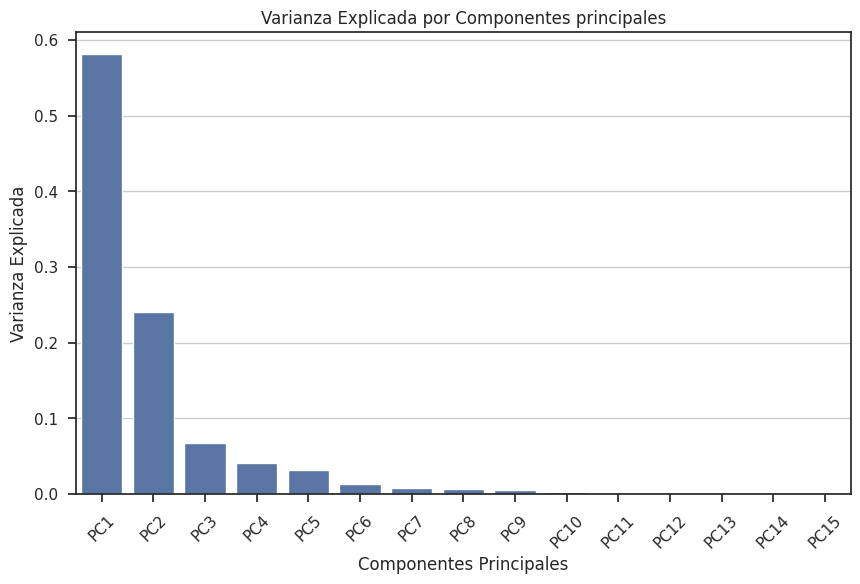

In [ ]:
plt.style.use('ggplot')
sns.set_theme(style="ticks")

plt.figure(figsize=(10, 6))
sns.barplot(x='Componente', y='Varianza Explicada', data=df_variance)
plt.xlabel('Componentes Principales')
plt.ylabel('Varianza Explicada')
plt.title('Varianza Explicada por Componentes principales')
plt.xticks(rotation=45)
plt.grid(True, axis='y')  # Añadir grid solo en el eje y
plt.show()


<Figure size 800x500 with 0 Axes>

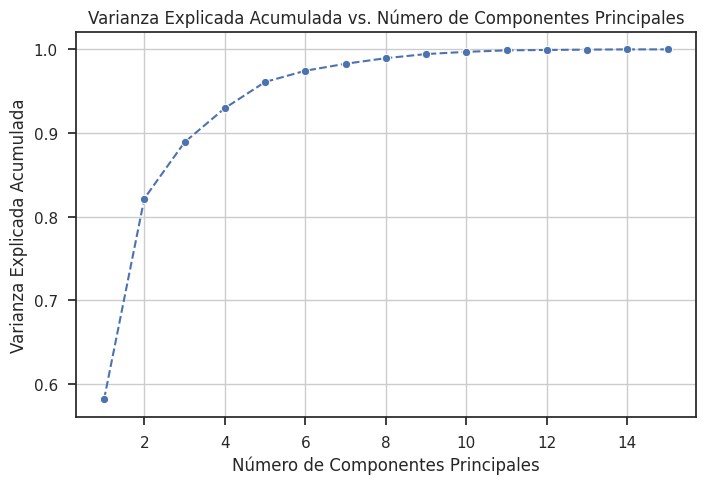

In [ ]:
plt.figure(figsize=(8, 5))
plt.style.use('ggplot')
sns.set_theme(style="ticks")

plt.figure(figsize=(8, 5))
sns.lineplot(x=range(1, len(var_ex_acumulada) + 1), y=var_ex_acumulada, marker='o', linestyle='--', color='b')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada Acumulada vs. Número de Componentes Principales')
plt.grid(True)
plt.show()

In [ ]:
var_ex_acumulada
var_ex_acumulada_lista = var_ex_acumulada.tolist()
var_ex_acumulada_lista[1:3]

[0.8216282524016083, 0.8889708912361177]

# Componenetes a Retener

De acuerdo con los gráficos anteriores, con solo tomando dos componentes principales nos proporciona 82% de los datos explicados. Por otro lado , si tomanos tres componentes principales, entonces se representaría los datos con más del 88%

In [ ]:
n = 2
modelo = PCA(n_components=n)
modelo_pca = modelo.fit_transform(df_st)
modelo_pca

array([[-3.70858575, -1.53363593],
       [-2.77278373, -1.44943763],
       [-2.39195069, -0.37290162],
       [-0.33571244,  0.31021374],
       [ 0.55255325, -0.69133726],
       [-1.74648501, -1.12367381],
       [-0.55052291, -0.78539016],
       [-1.9805939 , -0.21741946],
       [ 0.92389959, -0.21012343],
       [ 2.5018188 , -0.64137679],
       [ 5.74161036,  0.39842988],
       [ 3.34993538, -0.18244401],
       [-2.00687912, -0.98644339],
       [ 8.04991259,  0.35296219],
       [ 1.34665079, -0.71991219],
       [ 2.59734712, -0.55030269],
       [-1.6981611 ,  7.90158849],
       [-1.85762572, -0.07525304],
       [-2.47513346, -0.68804889],
       [-1.10224789, -0.43509795],
       [-2.43704615,  1.69960395]])

In [ ]:
# Crear DataFrame con los resultados del PCA para los individuos
pca_ind_df = pd.DataFrame(modelo_pca, columns=['PC1', 'PC2'], index=df.index)
pca_ind_df['Comunas'] = df['Comunas']
pca_ind_df = pca_ind_df.set_index('Comunas')
pca_ind_df.head().T

Comunas,Popular,Santa Cruz,Manrique,Aranjuez,Castilla
PC1,-3.708586,-2.772784,-2.391951,-0.335712,0.552553
PC2,-1.533636,-1.449438,-0.372902,0.310214,-0.691337


In [ ]:
pca_ind_df.shape

(21, 2)

# **Interpretación Punto - Variables**

In [ ]:
# Obtener los pesos de las variables originales en los componentes
component_loadings = pd.DataFrame(modelo.components_.T, columns=['PC1', 'PC2'])
component_loadings.head()

,PC1,PC2
0,0.330610,-0.062147
1,0.182249,-0.378030
2,0.029232,0.482282
3,0.324117,-0.074495
4,0.305924,-0.063065


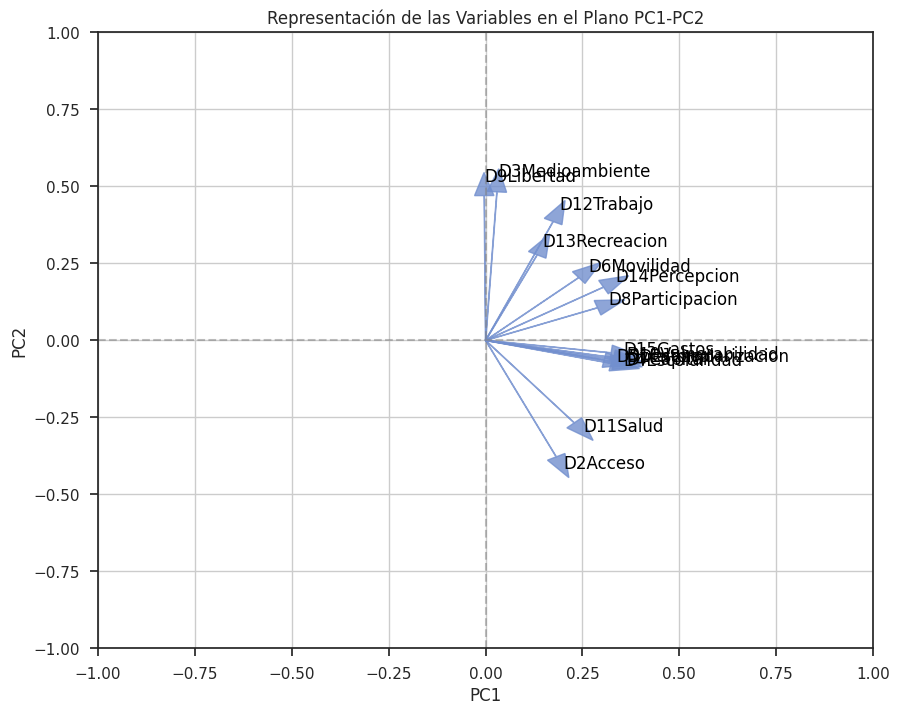

In [ ]:
plt.figure(figsize=(10, 8))
plt.style.use('ggplot')
sns.set_theme(style="ticks")

bdt = bd.iloc[:, 0:15]

# Iterar sobre las variables numéricas
for i, variable in enumerate(bdt.columns):
    plt.arrow(0, 0, component_loadings.iloc[i, 0], component_loadings.iloc[i, 1],
              color='#728FCE', alpha=0.8, head_width=0.05)
    plt.text(component_loadings.iloc[i, 0]*1.1, component_loadings.iloc[i, 1]*1.1,
             variable, fontsize=12, color='black')

# Agregar líneas de referencia en el origen
plt.axhline(0, color='gray', linestyle='--', alpha=0.5)
plt.axvline(0, color='gray', linestyle='--', alpha=0.5)

# Configurar los límites del gráfico
plt.xlim(-1, 1)
plt.ylim(-1, 1)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Representación de las Variables en el Plano PC1-PC2")
plt.grid()
plt.savefig("PCA1_PCA2.png", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
fig = go.Figure()
plt.style.use('ggplot')
sns.set_theme(style="ticks")
bdt = bd.iloc[:, 0:15]

# Agregar las flechas de cada variable
for i, var in enumerate(bdt.columns):
    fig.add_trace(go.Scatter(
        x=[0, component_loadings.iloc[i, 0]],  # Línea desde el origen hasta el punto
        y=[0, component_loadings.iloc[i, 1]],
        mode='lines+markers+text',
        marker=dict(size=5, color='red'),
        line=dict(width=2, color='red'),
        text=[None, var],  # Muestra el nombre de la variable al final de la flecha
        textposition="top center",
        hoverinfo="text"
    ))

# Agregar ejes centrales
fig.add_shape(type="line", x0=-1, x1=1, y0=0, y1=0, line=dict(color="gray", dash="dash"))
fig.add_shape(type="line", x0=0, x1=0, y0=-1, y1=1, line=dict(color="gray", dash="dash"))

fig.update_layout(
    title="Representación de las Variables en el Plano PC1-PC2",
    xaxis=dict(title="PC1", range=[-1, 1], zeroline=True),
    yaxis=dict(title="PC2", range=[-1, 1], zeroline=True),
    showlegend=False,
    width=900,  # Ancho en píxeles
    height=800  # Alto en píxeles
)

fig.show()


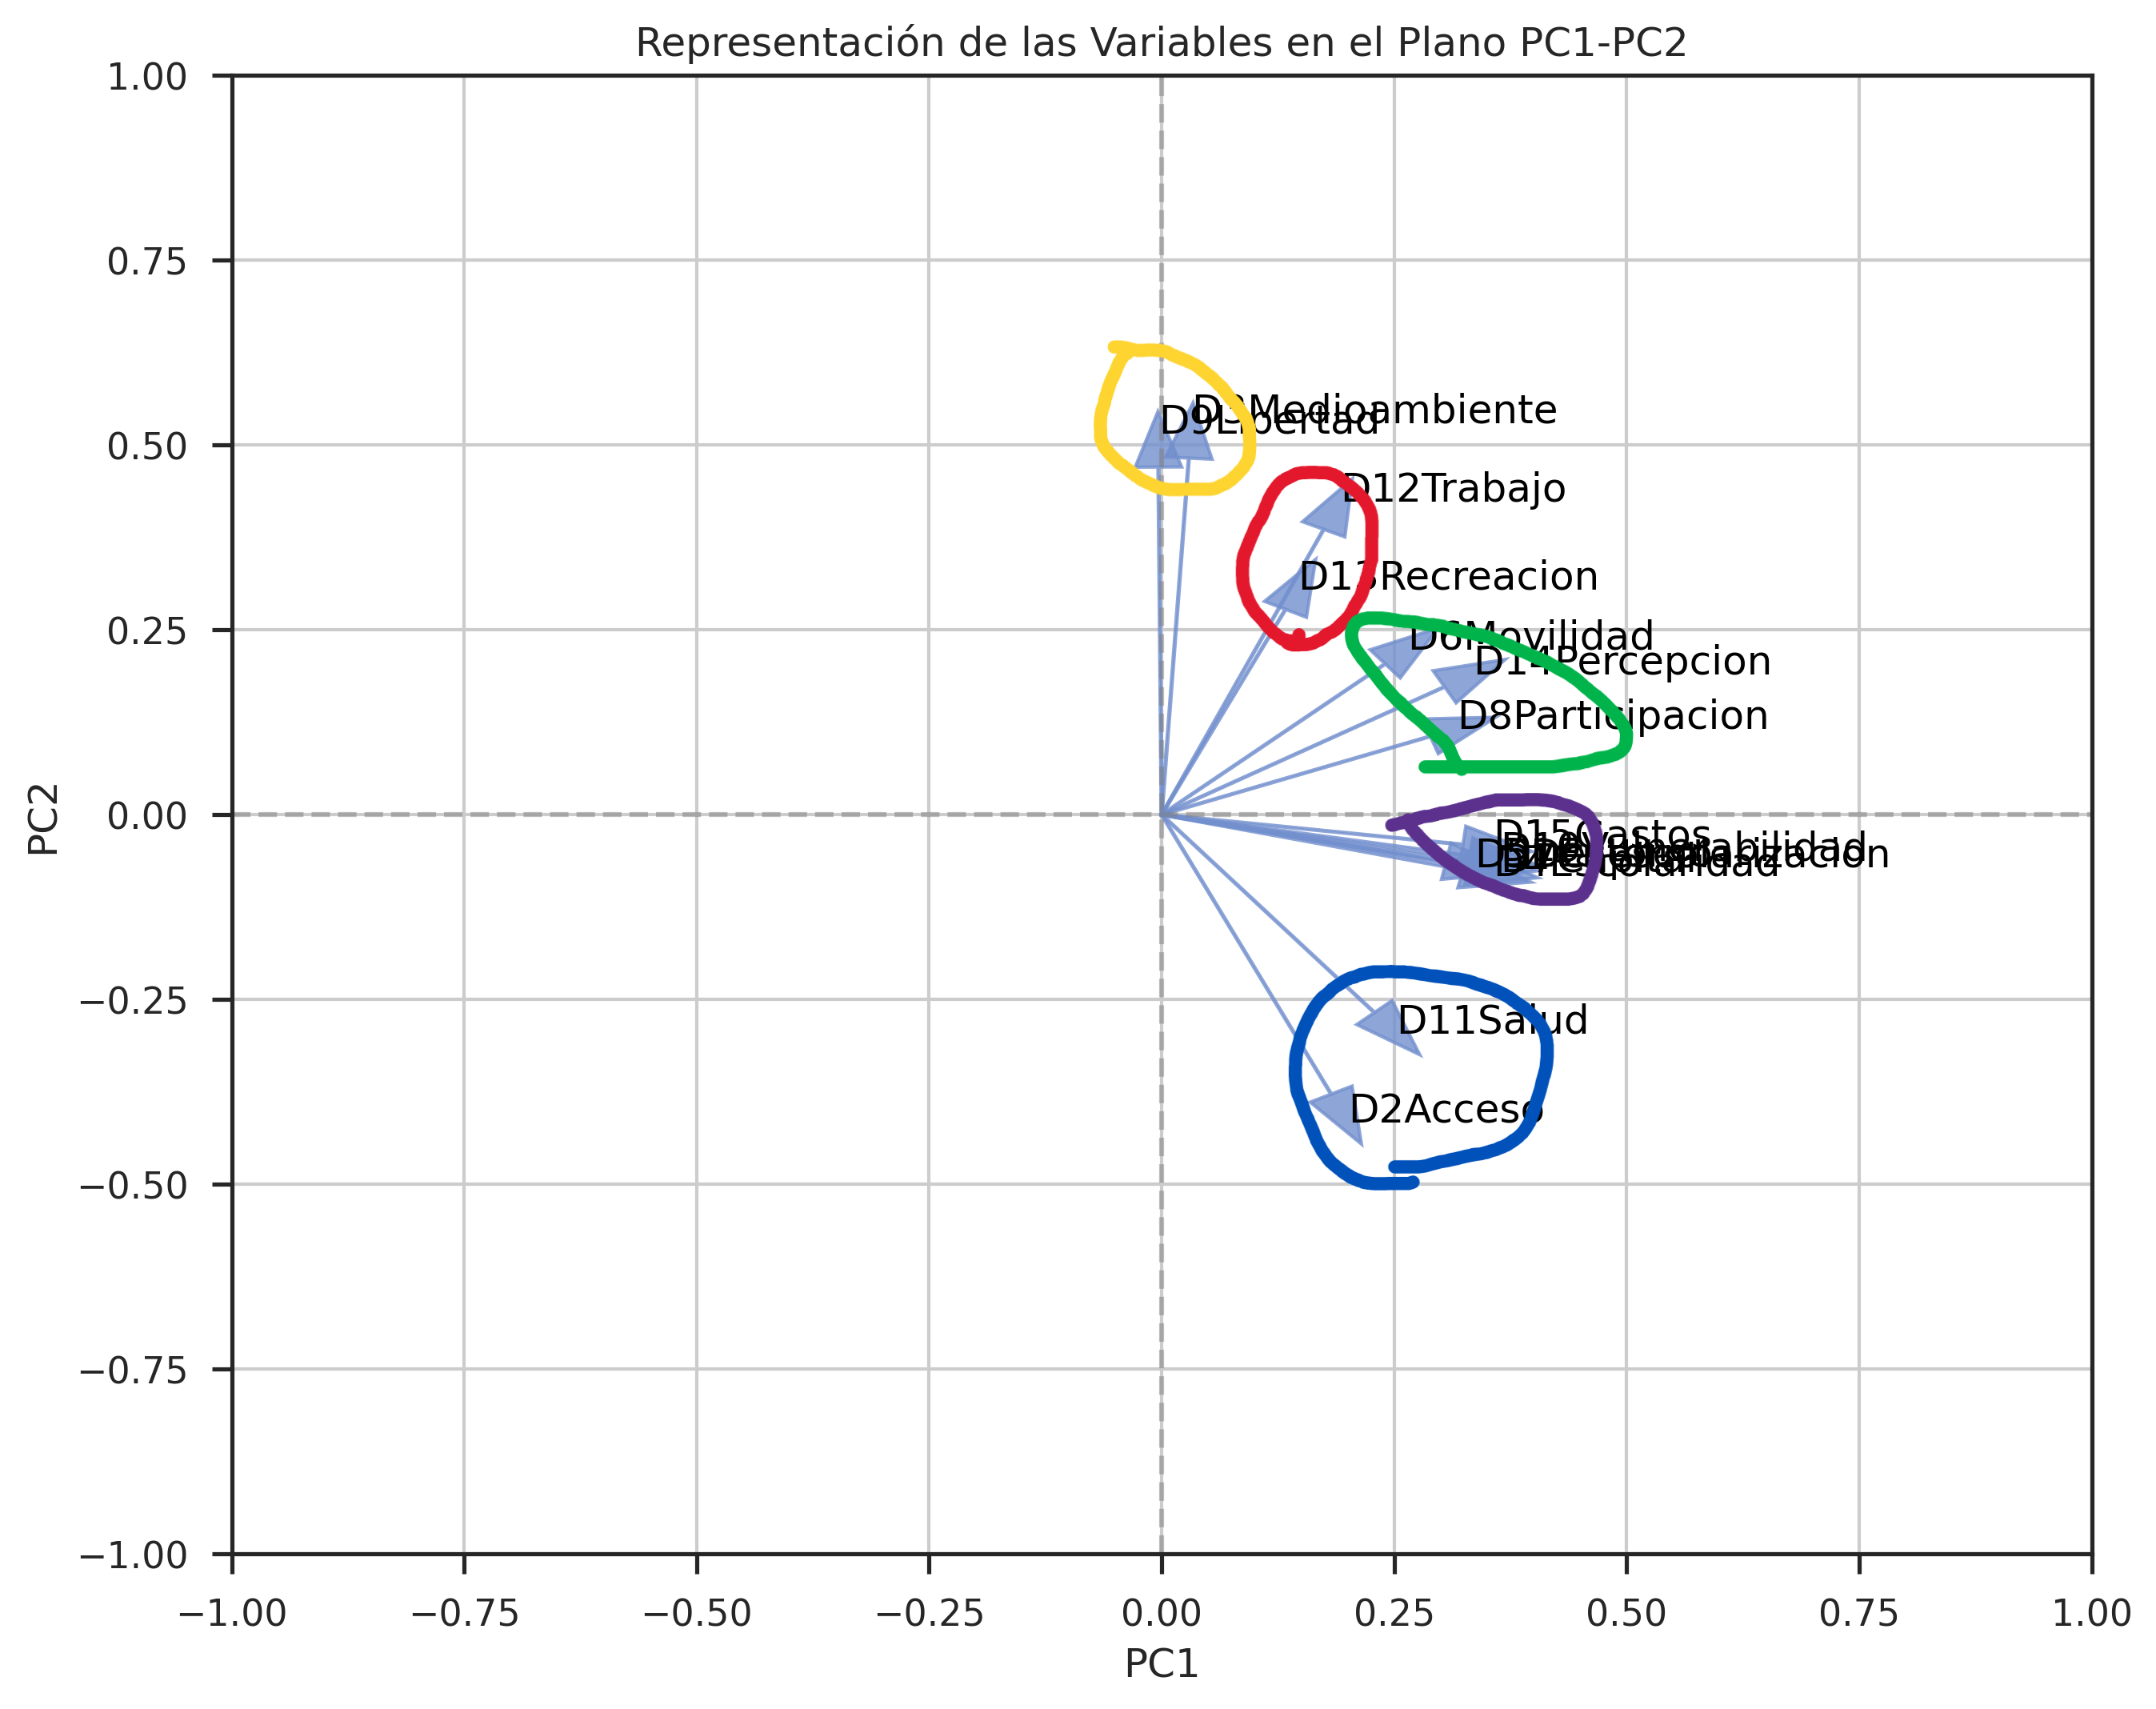

De los cinco grupos seleccionados tenemos que:

**1. Medio Ambiente y Libertad**

Se observa en el gráfico; en el grupo de color amarillo, que las dos variables tienen la misma dirección, lo cual indica una relación entre las dos variables. Esto significa que las personas que perciben un ambiente menos contaminado y más ordenado también tienden a percibir mayor seguridad y libertad en su entorno.

Siendo un poco más práctico, para las zonas con mejor percepción ambiental (menos contaminación, mejor arborización, menos ruido) también tienden a tener mejor percepción de seguridad y libertad o para las zonas con problemas ambientales (mucha contaminación, basura, ruido) podrían asociarse con una sensación de menor seguridad y menos libertad.

**2. Trabajo y Recreación**

En el segundo grupo (Color Rojo) se podría inferir que las personas con mayor estabilidad laboral y menor carga económica tienden a participar más en actividades recreativas. Es decir, si una persona tiene un empleo estable y menos presión económica, es más probable que tenga tiempo y recursos para participar en actividades deportivas, recreativas y culturales.

Por otro lado, si las personas con largas jornadas laborales y mayor carga económica pueden tener menos oportunidades de recreación. Es decir, un alto número de horas de trabajo y una alta carga económica pueden dificultar el acceso a actividades recreativas debido a la falta de tiempo o recursos disponibles.

**3. Salud y Acceso**

Para el grupo Azul. Estas variables estan relacionadas de modo que a mejor acceso a los servicios públicos mejor acceso a la salud.
Esto podría implicar que los hogares que cuentan con más servicios públicos disponibles (agua, electricidad, internet, etc.) también tienden a tener mejor acceso a servicios de salud, lo que indica que la infraestructura y los recursos básicos están conectados con la calidad de vida y el bienestar.

Asimismo, deficiencias en los servicios públicos pueden estar asociadas con dificultades en el acceso a la salud. por ejemplo:

Si hay más interrupciones en los servicios públicos (suspensiones frecuentes de agua o electricidad), esto podría afectar la disponibilidad y calidad de los servicios de salud, ya que hospitales y centros de salud dependen de estos recursos para operar eficientemente.


**4. Movilidad, Percepción y participación** Para el grupo de color verde. La correlación de estas variables podrían indicar que una infraestructura de transporte eficiente y accesible puede mejorar tanto la participación política como la percepción general de calidad de vida.



#**Interpretación Punto-Individuo**

In [ ]:
# Crear DataFrame con los resultados del PCA para los individuos
pca_ind_df = pd.DataFrame(modelo_pca, columns=['PC1', 'PC2'], index=df.index)
pca_ind_df['Comunas'] = df['Comunas']
pca_ind_df = pca_ind_df.set_index('Comunas')
pca_ind_df.head().T

Comunas,Popular,Santa Cruz,Manrique,Aranjuez,Castilla
PC1,-3.708586,-2.772784,-2.391951,-0.335712,0.552553
PC2,-1.533636,-1.449438,-0.372902,0.310214,-0.691337


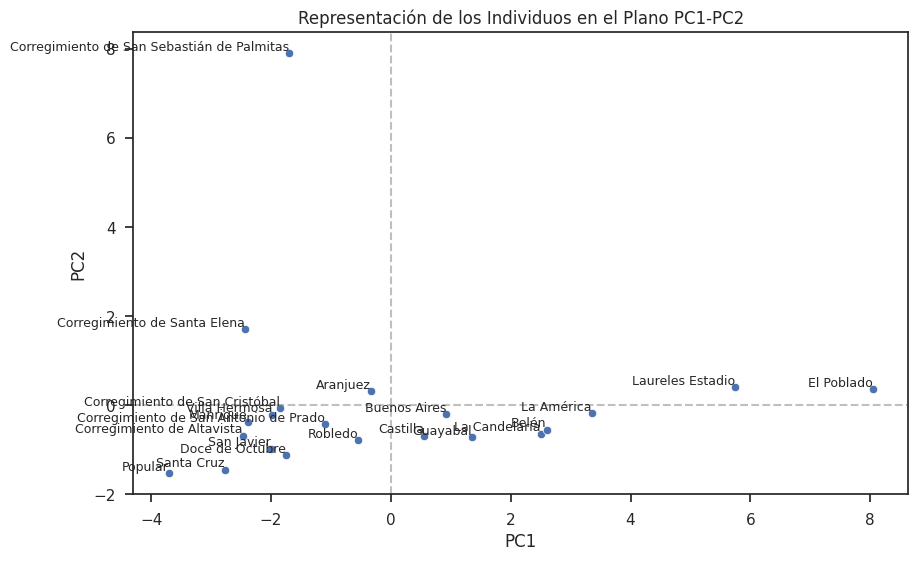

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_ind_df["PC1"], y=pca_ind_df["PC2"])

# Agregar etiquetas a los puntos
for i in pca_ind_df.index:
    plt.text(pca_ind_df.PC1[i], pca_ind_df.PC2[i], str(i), fontsize=9, ha='right', va='bottom')

# Agregar líneas de referencia en el origen
plt.axhline(0, color='gray', linestyle='--', alpha=0.5)
plt.axvline(0, color='gray', linestyle='--', alpha=0.5)

# Etiquetas y título
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Representación de los Individuos en el Plano PC1-PC2")

plt.show()


In [ ]:
import plotly.express as px

# Crear el gráfico interactivo
fig = px.scatter(pca_ind_df, x="PC1", y="PC2", text=pca_ind_df.index,
                 title="Representación de los Individuos en el Plano PC1-PC2",
                 labels={"PC1": "PC1", "PC2": "PC2"})

# Ajustar el diseño del gráfico
fig.update_traces(textposition='top right', marker=dict(size=8, opacity=0.7))

# Agregar líneas de referencia en el origen
fig.add_hline(y=0, line_dash="dash", line_color="gray")
fig.add_vline(x=0, line_dash="dash", line_color="gray")

# Mostrar el gráfico
fig.show()
